In [23]:
import os
import cv2
import numpy as np
from sklearn import utils
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [11]:
def create_labeled_data(data_dir):
    data = []
    label = []
    digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    for digit in digits:
        # print(digit)
        path = os.path.join(data_dir, str(digit))
        print(path)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                # img_array = np.array(img_array).reshape(-1)
                data.append(np.array(img_array))
                label.append(digit)
            except:
                pass
    shuffler = np.random.permutation(len(data))
    return utils.shuffle(data, label)
   

In [13]:
test_data_dir = 'C:/Users/Mohammad/Desktop/digit_clustering/Test'
train_data_dir = 'C:/Users/Mohammad/Desktop/digit_clustering/Train'

x_test, y_test = create_labeled_data(test_data_dir)
x_train, y_train = create_labeled_data(train_data_dir)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)

C:/Users/Mohammad/Desktop/digit_clustering/Test\0
C:/Users/Mohammad/Desktop/digit_clustering/Test\1
C:/Users/Mohammad/Desktop/digit_clustering/Test\2
C:/Users/Mohammad/Desktop/digit_clustering/Test\3
C:/Users/Mohammad/Desktop/digit_clustering/Test\4
C:/Users/Mohammad/Desktop/digit_clustering/Test\5
C:/Users/Mohammad/Desktop/digit_clustering/Test\6
C:/Users/Mohammad/Desktop/digit_clustering/Test\7
C:/Users/Mohammad/Desktop/digit_clustering/Test\8
C:/Users/Mohammad/Desktop/digit_clustering/Test\9
C:/Users/Mohammad/Desktop/digit_clustering/Train\0
C:/Users/Mohammad/Desktop/digit_clustering/Train\1
C:/Users/Mohammad/Desktop/digit_clustering/Train\2
C:/Users/Mohammad/Desktop/digit_clustering/Train\3
C:/Users/Mohammad/Desktop/digit_clustering/Train\4
C:/Users/Mohammad/Desktop/digit_clustering/Train\5
C:/Users/Mohammad/Desktop/digit_clustering/Train\6
C:/Users/Mohammad/Desktop/digit_clustering/Train\7
C:/Users/Mohammad/Desktop/digit_clustering/Train\8
C:/Users/Mohammad/Desktop/digit_clusterin

In [17]:
model = tf.keras.Sequential([
  keras.layers.Flatten(input_shape=(25, 25)), 
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10)])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1840/1840 [==============================] - 2s 1ms/step - loss: 2.0382 - accuracy: 0.8800
Epoch 2/15
1840/1840 [==============================] - 2s 933us/step - loss: 0.3560 - accuracy: 0.9146
Epoch 3/15
1840/1840 [==============================] - 2s 898us/step - loss: 0.2702 - accuracy: 0.9297
Epoch 4/15
1840/1840 [==============================] - 2s 879us/step - loss: 0.2418 - accuracy: 0.9361
Epoch 5/15
1840/1840 [==============================] - 2s 959us/step - loss: 0.2154 - accuracy: 0.9420
Epoch 6/15
1840/1840 [==============================] - 2s 971us/step - loss: 0.2069 - accuracy: 0.9450
Epoch 7/15
1840/1840 [==============================] - 2s 1ms/step - loss: 0.1993 - accuracy: 0.9477
Epoch 8/15
1840/1840 [==============================] - 2s 1ms/step - loss: 0.1860 - accuracy: 0.9517
Epoch 9/15
1840/1840 [==============================] - 2s 989us/step - loss: 0.1847 - accuracy: 0.9519
Epoch 10/15
1840/1840 [==============================] - 2s 875us/step

In [21]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

300/300 - 0s - loss: 0.2248 - accuracy: 0.9499

Test accuracy: 0.9498540163040161


In [35]:
predictions = model.predict(x_test)
def plot_image(i, predictions_array, true_label, img):
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

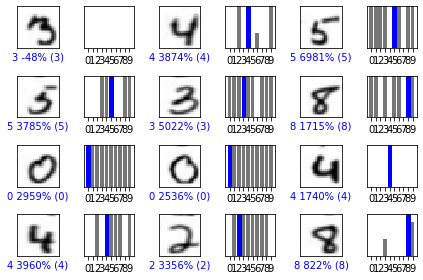

In [36]:
num_rows = 4
num_cols = 3
for i in range(num_rows*num_cols):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()